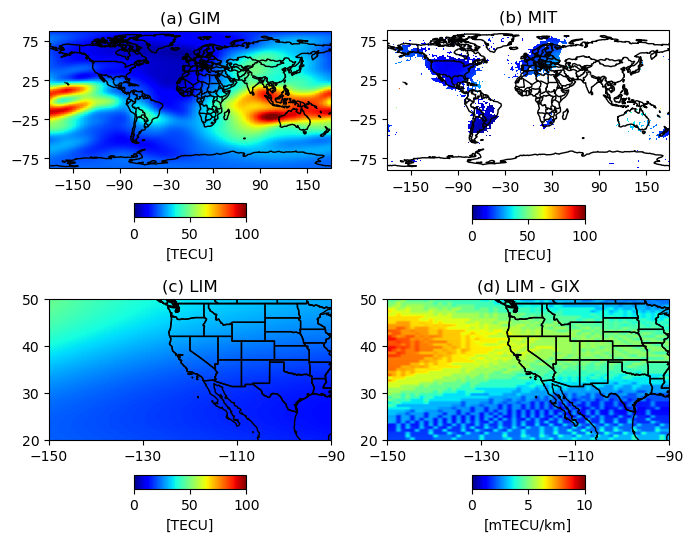

In [1]:
from mintpy.objects import ionex
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import h5py

# 读取 IONEX 文件
tec_file = '/home/eedy/data/aux/IONEX/jplg1250.23i'
mins, lat, lon, tec_maps, rms_maps = ionex.read_ionex(tec_file)

# 读取 netCDF 文件
filename_nc = '/home/eedy/data/aux/IONEX/gps230505g.001.nc'
dataset = Dataset(filename_nc, 'r')
lat_nc = dataset.variables['gdlat'][:]
lon_nc = dataset.variables['glon'][:]
tec_nc = dataset.variables['tec'][:]
dataset.close()
utc_min = np.arange(0, 24 * 60, 5)

# 读取 LIM 文件
filename_lim = '/home/eedy/data/aux/LIM/USA/2023/USA1390.h5'


def read_LIM_file(filename):
    with h5py.File(filename, 'r') as f:
        tec_maps = f['GIM_all'][:]

    # 交换维度顺序，从 (lons, lats, mins) 变为 (mins, lats, lons)
    tec_maps = np.transpose(tec_maps, (2, 1, 0))

    # 定义经纬度和时间间隔
    lon = np.arange(-150, -90 + 1, 1)
    lat = np.arange(10, 60 + 1, 1)
    mins = np.arange(0, 1440 + 60, 60)

    return lat, lon, tec_maps, mins


lat_lim, lon_lim, tec_maps_lim, mins_lim = read_LIM_file(filename_lim)


def read_LIM_file_gix(filename):
    with h5py.File(filename, 'r') as f:
        tec_maps = f['GIX_all'][:]

    # 交换维度顺序，从 (lons, lats, mins) 变为 (mins, lats, lons)
    tec_maps = np.transpose(tec_maps, (2, 1, 0))

    # 定义经纬度和时间间隔
    lon = np.arange(-150, -90 + 1, 1)
    lat = np.arange(10, 60 + 1, 1)
    mins = np.arange(0, 1440 + 60, 60)

    return lat, lon, tec_maps, mins


lat_lim_gix, lon_lim_gix, tec_maps_lim_gix, mins_lim_gix = read_LIM_file_gix(filename_lim)

# 创建带有4个子图的图形
fig, axes = plt.subplots(2, 2, figsize=(8, 7), 
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        gridspec_kw={'hspace': 0, 'wspace': 0.2})

# 定义公共参数
local_extent = [-150, -90, 20, 50]
cmap = 'jet'
colorbar_params = {
    'orientation': 'horizontal',
    'label': '[TECU]',
    'fraction': 0.05,
    'pad': 0.15
}

# 绘制第一个子图 (a) GIM
ax = axes[0,0]
im1 = ax.imshow(tec_maps[3], cmap=cmap, origin='lower',
               extent=[lon.min(), lon.max(), lat.min(), lat.max()],
               transform=ccrs.PlateCarree(), vmin=0, vmax=100)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_xticks(np.arange(-150, 151, 60))
ax.set_yticks(np.arange(-75, 76, 50))
ax.set_title('(a) GIM')

# 第一个子图的colorbar
cax1 = fig.add_axes([ax.get_position().x0 + 0.3*ax.get_position().width,  # 水平居中
                    ax.get_position().y0 - 0.07,  # 位于子图下方
                    0.4*ax.get_position().width,  # 宽度为子图的40%
                    0.02])  # 高度
fig.colorbar(im1, cax=cax1, **colorbar_params)

# 绘制第二个子图 (b) MIT
ax = axes[0,1]
im2 = ax.imshow(tec_nc[72], cmap=cmap, origin='lower',
               extent=[lon_nc.min(), lon_nc.max(), lat_nc.min(), lat_nc.max()],
               transform=ccrs.PlateCarree(), vmin=0, vmax=100)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_xticks(np.arange(-150, 151, 60))
ax.set_yticks(np.arange(-75, 76, 50))
ax.set_title('(b) MIT')

# 第二个子图的colorbar
cax2 = fig.add_axes([ax.get_position().x0 + 0.3*ax.get_position().width,
                    ax.get_position().y0 - 0.07,
                    0.4*ax.get_position().width,
                    0.02])
fig.colorbar(im2, cax=cax2, **colorbar_params)

# 绘制第三个子图 (c) LIM
ax = axes[1,0]
im3 = ax.imshow(tec_maps_lim[6], cmap=cmap, origin='lower',
               extent=local_extent,
               transform=ccrs.PlateCarree(), vmin=0, vmax=100)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_xticks(np.arange(-150, -89, 20))
ax.set_yticks(np.arange(20, 51, 10))
ax.set_title('(c) LIM')

# 第三子图的colorbar
cax3 = fig.add_axes([ax.get_position().x0 + 0.3*ax.get_position().width,
                    ax.get_position().y0 - 0.07,
                    0.4*ax.get_position().width,
                    0.02])
fig.colorbar(im3, cax=cax3, **colorbar_params)

# 绘制第四个子图 (d) LIM-GIM
ax = axes[1,1]
im4 = ax.imshow(tec_maps_lim_gix[6], cmap=cmap, origin='lower',
               extent=local_extent,
               transform=ccrs.PlateCarree(), vmin=0, vmax=10)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_xticks(np.arange(-150, -89, 20))
ax.set_yticks(np.arange(20, 51, 10))
ax.set_title('(d) LIM - GIX')

# 第四个子图的colorbar（不同参数）
cax4 = fig.add_axes([ax.get_position().x0 + 0.3*ax.get_position().width,
                    ax.get_position().y0 - 0.07,
                    0.4*ax.get_position().width,
                    0.02])
fig.colorbar(im4, cax=cax4, orientation='horizontal', 
            label='[mTECU/km]', fraction=0.05, pad=0.15)

# 调整布局并保存
plt.savefig('pdf/iono_map.pdf', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

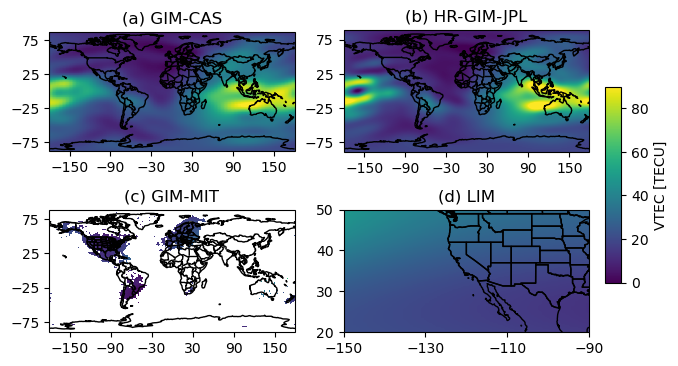

In [35]:
from mintpy.objects import ionex
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import h5py

# 读取 IONEX 文件
tec_file = '/home/eedy/data/aux/IONEX/casg1250.23i'
mins, lat, lon, tec_maps, rms_maps = ionex.read_ionex(tec_file)

# 读取 hr-gim-JPL 文件
filename_nc = '/home/eedy/data/aux/IONEX/jpld1250.23i.nc'
dataset = Dataset(filename_nc, 'r')
lat_hr = dataset.variables['lat'][:]
lon_hr = dataset.variables['lon'][:]
tec_hr = dataset.variables['tecmap'][:]
dataset.close()

# 读取 netCDF 文件
filename_nc = '/home/eedy/data/aux/IONEX/gps230505g.001.nc'
dataset = Dataset(filename_nc, 'r')
lat_nc = dataset.variables['gdlat'][:]
lon_nc = dataset.variables['glon'][:]
tec_nc = dataset.variables['tec'][:]
dataset.close()
utc_min = np.arange(0, 24 * 60, 5)

# 读取 LIM 文件
filename_lim = '/home/eedy/data/aux/LIM/USA/2023/USA1390.h5'
def read_LIM_file(filename):
    with h5py.File(filename, 'r') as f:
        tec_maps = f['GIM_all'][:]

    # 交换维度顺序，从 (lons, lats, mins) 变为 (mins, lats, lons)
    tec_maps = np.transpose(tec_maps, (2, 1, 0))

    # 定义经纬度和时间间隔
    lon = np.arange(-150, -90 + 1, 1)
    lat = np.arange(10, 60 + 1, 1)
    mins = np.arange(0, 1440 + 60, 60)

    return lat, lon, tec_maps, mins


lat_lim, lon_lim, tec_maps_lim, mins_lim = read_LIM_file(filename_lim)


def read_LIM_file_gix(filename):
    with h5py.File(filename, 'r') as f:
        tec_maps = f['GIX_all'][:]

    # 交换维度顺序，从 (lons, lats, mins) 变为 (mins, lats, lons)
    tec_maps = np.transpose(tec_maps, (2, 1, 0))

    # 定义经纬度和时间间隔
    lon = np.arange(-150, -90 + 1, 1)
    lat = np.arange(10, 60 + 1, 1)
    mins = np.arange(0, 1440 + 60, 60)

    return lat, lon, tec_maps, mins


lat_lim_gix, lon_lim_gix, tec_maps_lim_gix, mins_lim_gix = read_LIM_file_gix(filename_lim)

# 创建带有4个子图的图形
fig, axes = plt.subplots(2, 2, figsize=(8, 7), 
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        gridspec_kw={'hspace': -0.5, 'wspace': 0.2})

# 绘制第一个子图 (a) GIM
ax = axes[0,0]
im1 = ax.imshow(tec_maps[12], cmap=cmap, origin='lower',
               extent=[lon.min(), lon.max(), lat.min(), lat.max()],
               transform=ccrs.PlateCarree(), vmin=0, vmax=90)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_xticks(np.arange(-150, 151, 60))
ax.set_yticks(np.arange(-75, 76, 50))
ax.set_title('(a) GIM-CAS')

# 绘制第二个子图 (b) MIT
ax = axes[0,1]
im2 = ax.imshow(tec_hr[24], cmap=cmap, origin='lower',
               extent=[lon_nc.min(), lon_nc.max(), lat_nc.min(), lat_nc.max()],
               transform=ccrs.PlateCarree(), vmin=0, vmax=90)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_xticks(np.arange(-150, 151, 60))
ax.set_yticks(np.arange(-75, 76, 50))
ax.set_title('(b) HR-GIM-JPL')

# 绘制第三个子图 (c) LIM
ax = axes[1,0]
im3 = ax.imshow(tec_nc[72], cmap=cmap, origin='lower',
               extent=[lon_nc.min(), lon_nc.max(), lat_nc.min(), lat_nc.max()],
               transform=ccrs.PlateCarree(), vmin=0, vmax=90)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_xticks(np.arange(-150, 151, 60))
ax.set_yticks(np.arange(-75, 76, 50))
ax.set_title('(c) GIM-MIT')

# 绘制第四个子图 (d) LIM-GIM
ax = axes[1,1]
im4 = ax.imshow(tec_maps_lim[6,:,:], cmap=cmap, origin='lower',
               extent=[-150,-90,20,50],
               transform=ccrs.PlateCarree(), vmin=0, vmax=90)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_xticks(np.arange(-150, -89, 20))
ax.set_yticks(np.arange(20, 51, 10))
ax.set_title('(d) LIM')

# 调整布局以给颜色条留出空间
fig.subplots_adjust(right=0.8)

# 在整个图形的右边添加颜色条
cbar_ax = fig.add_axes([0.82, 0.35, 0.02, 0.28])
fig.colorbar(im1, cax=cbar_ax, label='VTEC [TECU]')

# 调整布局并保存
plt.savefig('pdf/iono_map.pdf', bbox_inches='tight', transparent=True, dpi=600)
plt.show()